In [1]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical   
from keras.datasets import mnist
#import fashion_mnist

(train_X,train_Y), (test_X,test_Y) = mnist.load_data()


Using TensorFlow backend.
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
print(train_X.shape, train_Y.shape)

print( test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')


In [6]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [8]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [9]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [18]:
batch_size = 64
epochs = 10
num_classes = 10
input_shape=(28,28,1)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
# 32 filters of 5*5 window with 1,1 stride  . Filters are also called output channels. 
#next layer will get 32 channels as input
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
# 64 filters of 5*5 
#The default strides argument in the Conv2D() function is (1, 1) in Keras, so we can leave it out.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # we want to flatten the output from these to enter our fully connected layers 4, 4, 64 =1024

model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(100, activation='relu'))
#model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [25]:
train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 43s 889us/step - loss: 14.6638 - acc: 0.0902 - val_loss: 14.6554 - val_acc: 0.0907
Epoch 2/10
48000/48000 [==============================] - 42s 872us/step - loss: 14.6634 - acc: 0.0902 - val_loss: 14.6554 - val_acc: 0.0907
Epoch 3/10
48000/48000 [==============================] - 44s 909us/step - loss: 14.6634 - acc: 0.0902 - val_loss: 14.6554 - val_acc: 0.0907
Epoch 4/10
48000/48000 [==============================] - 44s 914us/step - loss: 14.6634 - acc: 0.0902 - val_loss: 14.6554 - val_acc: 0.0907
Epoch 5/10
48000/48000 [==============================] - 42s 874us/step - loss: 14.6634 - acc: 0.0902 - val_loss: 14.6554 - val_acc: 0.0907
Epoch 6/10
48000/48000 [==============================] - 45s 942us/step - loss: 14.6634 - acc: 0.0902 - val_loss: 14.6554 - val_acc: 0.0907
Epoch 7/10
48000/48000 [==============================] - 41s 852us/step - loss: 14.6634 - acc: 0.0902 -

In [15]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [16]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 14.535298265075683
Test accuracy: 0.0982


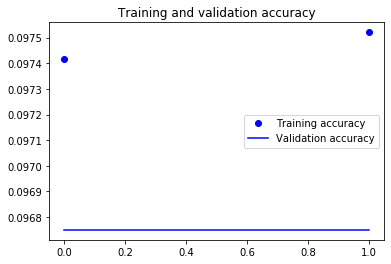

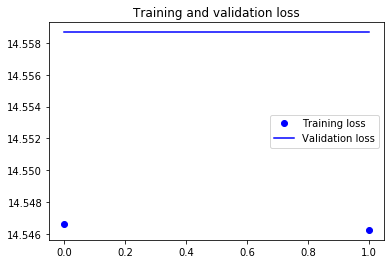

In [17]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()